In [4]:
import pandas as pd
import matplotlib.pyplot as plt

file_name = 'processing_ready_data.xlsx'
df = pd.read_excel(io=file_name)

df_no_outliers = df[df.weekly_minutes < 500]

(array([52., 57., 59., 35., 17., 15.]),
 array([1.07900318, 1.89916932, 2.71933545, 3.53950159, 4.35966773,
        5.17983386, 6.        ]),
 <BarContainer object of 6 artists>)

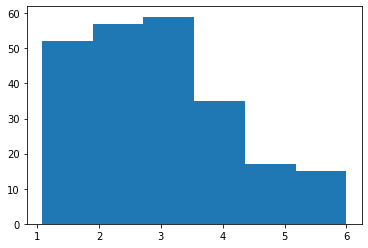

In [9]:
plt.hist(sorted(df.extreme_score), bins=6)

(array([79., 42., 33., 19., 21.,  8., 11.,  3.,  1.,  3.,  1.,  2.,  0.,
         4.,  1.,  0.,  0.,  0.,  0.,  7.]),
 array([ 0.5  ,  1.525,  2.55 ,  3.575,  4.6  ,  5.625,  6.65 ,  7.675,
         8.7  ,  9.725, 10.75 , 11.775, 12.8  , 13.825, 14.85 , 15.875,
        16.9  , 17.925, 18.95 , 19.975, 21.   ]),
 <BarContainer object of 20 artists>)

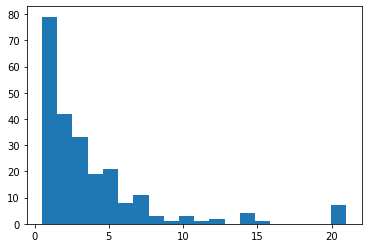

In [28]:
plt.hist(sorted(df.weekly_session), bins=20)

In [11]:
import pingouin as pg

pg.cronbach_alpha(data=df[['extreme_1', 'extreme_2', 'extreme_3', 'extreme_4', 'extreme_5', 'extreme_6', 'extreme_7', 'extreme_8']])

(0.7966855089017079, array([0.755, 0.834]))

In [56]:
def negative_bold(val):
    bold = 'bold' if 1 > abs(val) > 0.2 else ''
    return f'font-weight: {bold}'

df_no_outliers[df.columns[2:]].corr('spearman')[8:].style.applymap(negative_bold)

,extreme_1,extreme_2,extreme_3,extreme_4,extreme_5,extreme_6,extreme_7,extreme_8,extreme_score,PPCS_1,PPCS_2,PPCS_3,PPCS_4,PPCS_5,PPCS_6,PPCS_score,PPCS_7,well-being,father_relations,mother_relations,friends_relations,romantic_life,sexual_life,reenacting,weekly_session,session_time,weekly_minutes,age,in_relationship,believes_in_god
extreme_score,0.132623,0.431908,0.668620,0.656451,0.695981,0.790876,0.756140,0.680252,1.000000,0.402023,0.411888,0.305880,0.330474,0.154622,0.163025,0.422108,0.487455,-0.022643,-0.068116,-0.156138,-0.004941,-0.050595,-0.024862,0.346110,0.434787,0.111235,0.437435,0.008447,0.056943,-0.106102
PPCS_1,0.155469,0.451918,0.314807,0.264445,0.296109,0.328189,0.245370,0.151900,0.402023,1.000000,0.518975,0.547710,0.523550,0.283111,0.479342,0.735077,0.286246,-0.059124,-0.114414,-0.147207,-0.027400,-0.112485,-0.093291,0.370517,0.489958,0.128266,0.499028,0.071557,-0.035516,0.027070
PPCS_2,0.171337,0.360752,0.330132,0.269235,0.254400,0.307173,0.287751,0.231005,0.411888,0.518975,1.000000,0.427120,0.431036,0.294184,0.275985,0.706687,0.341590,-0.113624,-0.045658,-0.122761,0.012656,-0.176964,-0.139963,0.281923,0.491132,0.009646,0.420204,0.200169,-0.072030,-0.035059
PPCS_3,0.093389,0.236250,0.192606,0.293358,0.257424,0.144274,0.219154,0.229809,0.305880,0.547710,0.427120,1.000000,0.614864,0.491377,0.440860,0.739371,0.370992,-0.174226,-0.038100,-0.221170,-0.151341,-0.178451,-0.126519,0.187699,0.343454,0.195570,0.433157,0.076322,-0.061396,0.122888
PPCS_4,0.227780,0.353892,0.274776,0.273914,0.276763,0.207852,0.192657,0.197277,0.330474,0.523550,0.431036,0.614864,1.000000,0.490723,0.508973,0.751928,0.513002,-0.127892,-0.122454,-0.187248,-0.098680,-0.141591,-0.091058,0.133064,0.338837,0.126488,0.406931,0.011911,-0.026636,0.233361
PPCS_5,0.056625,0.130845,0.143552,0.160784,0.116988,0.043765,0.136032,0.122667,0.154622,0.283111,0.294184,0.491377,0.490723,1.000000,0.411858,0.681075,0.345229,-0.131580,0.011788,-0.017679,-0.041649,-0.148757,-0.183932,0.059718,0.280714,0.061503,0.299453,-0.060024,-0.142980,0.194581
PPCS_6,0.084841,0.213018,0.101353,0.175862,0.124684,0.079827,0.131184,0.144653,0.163025,0.479342,0.275985,0.440860,0.508973,0.411858,1.000000,0.648422,0.307620,-0.212568,-0.097235,-0.125599,-0.086298,-0.246321,-0.192887,0.143794,0.246008,0.090537,0.280021,-0.104335,-0.148234,0.149185
PPCS_score,0.155760,0.368337,0.351274,0.313992,0.316198,0.273955,0.276400,0.261612,0.422108,0.735077,0.706687,0.739371,0.751928,0.681075,0.648422,1.000000,0.487069,-0.188434,-0.075189,-0.145256,-0.047057,-0.237760,-0.199242,0.277539,0.510437,0.136101,0.525801,0.029639,-0.133169,0.120968
PPCS_7,0.076266,0.141986,0.277221,0.361131,0.323164,0.311640,0.435625,0.451897,0.487455,0.286246,0.341590,0.370992,0.513002,0.345229,0.307620,0.487069,1.000000,-0.160460,-0.154078,-0.214070,-0.104585,-0.132746,-0.068868,0.120250,0.253638,0.168185,0.322658,-0.051239,-0.069539,0.080614
well-being,0.018629,-0.013241,-0.043064,0.031649,0.005412,-0.006212,-0.024659,-0.018232,-0.022643,-0.059124,-0.113624,-0.174226,-0.127892,-0.131580,-0.212568,-0.188434,-0.160460,1.000000,0.271500,0.407730,0.454040,0.397273,0.395236,0.030882,-0.080893,-0.046999,-0.090068,0.037334,0.138795,-0.002775


In [43]:
from sklearn import linear_model

x = df[['weekly_session', 'extreme_score']]
y = df['PPCS_7']

regr = linear_model.LinearRegression()
regr.fit(x, y)

regr.score(x, y)

0.31119922957321455